# Imports e Configs 

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    mean_absolute_error,
    mean_squared_error,
    PredictionErrorDisplay,
    root_mean_squared_error,
    r2_score
)

from src.config import DADOS_TRATADOS
from src.auxiliares import dataframe_coeficientes
from src.graficos import (
    plot_coeficientes,
    plot_residuos
)

sns.set_theme(palette='bright')

RANDOM_STATE = 42

# Importação da base tratada

In [2]:
df = pd.read_parquet(DADOS_TRATADOS)

df.head()

,idade,sexo,imc,pressao_media,colesterol_total,ldl,hdl,colesterol_hdl,triglicerides,glicose,target
0,59,2,32.099998,101.0,157,93.199997,38.0,4.0,4.8598,87,151
1,48,1,21.600000,87.0,183,103.199997,70.0,3.0,3.8918,69,75
2,72,2,30.500000,93.0,156,93.599998,41.0,4.0,4.6728,85,141
3,24,1,25.299999,84.0,198,131.399994,40.0,5.0,4.8903,89,206
4,50,1,23.000000,101.0,192,125.400002,52.0,4.0,4.2905,80,135


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   idade             442 non-null    int8   
 1   sexo              442 non-null    int8   
 2   imc               442 non-null    float32
 3   pressao_media     442 non-null    float32
 4   colesterol_total  442 non-null    int16  
 5   ldl               442 non-null    float32
 6   hdl               442 non-null    float32
 7   colesterol_hdl    442 non-null    float32
 8   triglicerides     442 non-null    float32
 9   glicose           442 non-null    int8   
 10  target            442 non-null    int16  
dtypes: float32(6), int16(2), int8(3)
memory usage: 13.5 KB


## Adequação e criação de variáveis de treino e teste

In [4]:
X = df.drop(columns='target')
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.2, random_state=RANDOM_STATE
)

In [5]:
X_train.head()

,idade,sexo,imc,pressao_media,colesterol_total,ldl,hdl,colesterol_hdl,triglicerides,glicose
17,68,2,27.500000,111.0,214,147.000000,39.0,5.0,4.9416,91
66,46,2,24.700001,85.0,174,123.199997,30.0,6.0,4.6444,96
137,50,1,31.000000,123.0,178,105.000000,48.0,4.0,4.8283,88
245,41,1,23.100000,86.0,148,78.000000,58.0,3.0,4.0943,60
31,42,1,20.299999,71.0,161,81.199997,66.0,2.0,4.2341,81


In [6]:
X_test.head()

,idade,sexo,imc,pressao_media,colesterol_total,ldl,hdl,colesterol_hdl,triglicerides,glicose
287,61,1,25.799999,90.000000,280,195.399994,55.0,5.0,4.9972,90
211,74,1,29.799999,101.000000,171,104.800003,50.0,3.0,4.3944,86
72,66,2,26.000000,91.000000,264,146.600006,65.0,4.0,5.5683,87
321,75,1,31.200001,117.669998,229,138.800003,29.0,7.9,5.7236,106
73,52,2,24.500000,94.000000,217,149.399994,48.0,5.0,4.5850,89


In [7]:
X_train.shape

(353, 10)

In [8]:
X_test.shape

(89, 10)

In [9]:
y_train.head()

17     144
66     150
137    280
245    125
31      59
Name: target, dtype: int16

In [10]:
y_test.head()

287    219
211     70
72     202
321    230
73     111
Name: target, dtype: int16

In [11]:
y_train.shape

(353,)

In [12]:
y_test.shape

(89,)

# Treinamento do modelo

In [13]:
reg = LinearRegression()

reg.fit(X_train, y_train)

LinearRegression()

In [14]:
reg.score(X_train, y_train)

0.5279194116592407

In [15]:
reg.score(X_test, y_test)

0.45260268449783325

In [16]:
reg.coef_

array([  0.13768725, -23.064405  ,   5.8463593 ,   1.1970953 ,
        -1.2816836 ,   0.8111512 ,   0.60165125,  10.159543  ,
        67.10898   ,   0.20159732], dtype=float32)

In [17]:
reg.intercept_

np.float32(-341.37845)

In [18]:
coefs = dataframe_coeficientes(reg.coef_, X.columns)

coefs

,coeficiente
sexo,-23.064405
colesterol_total,-1.281684
idade,0.137687
glicose,0.201597
hdl,0.601651
ldl,0.811151
pressao_media,1.197095
imc,5.846359
colesterol_hdl,10.159543
triglicerides,67.108978


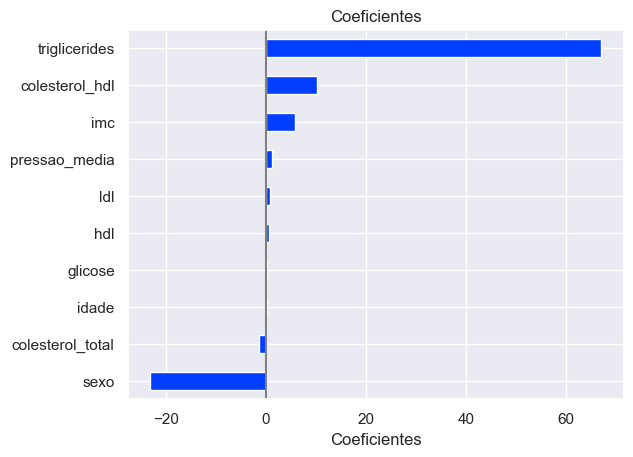

In [19]:
plot_coeficientes(coefs)

In [20]:
y_pred = reg.predict(X_test)

y_pred

array([139.54755 , 179.51712 , 134.03882 , 291.41714 , 123.7897  ,
        92.17233 , 258.2324  , 181.33737 ,  90.22415 , 108.63376 ,
        94.13861 , 168.43488 ,  53.5047  , 206.63089 , 100.12927 ,
       130.6665  , 219.53079 , 250.78036 , 196.36887 , 218.57516 ,
       207.35043 ,  88.48334 ,  70.43274 , 188.95926 , 154.88675 ,
       159.3617  , 188.31265 , 180.39102 ,  47.990356, 108.97455 ,
       174.77884 ,  86.36401 , 132.95761 , 184.53824 , 173.83212 ,
       190.35861 , 124.41559 , 119.65112 , 147.95169 ,  59.053986,
        71.62323 , 107.68289 , 165.4537  , 155.00977 , 171.048   ,
        61.45755 ,  71.666626, 114.967255,  51.57968 , 167.57593 ,
       152.52277 ,  62.955627, 103.497406, 109.20743 , 175.64139 ,
       154.6029  ,  94.41696 , 210.7421  , 120.25656 ,  77.61569 ,
       187.93204 , 206.49332 , 140.63159 , 105.5968  , 130.70432 ,
       202.1854  , 171.13052 , 164.91434 , 124.72467 , 144.81036 ,
       181.99643 , 199.41379 , 234.21439 , 145.9567  ,  79.866

In [21]:
r2_score(y_test, y_pred)

0.45260268449783325

In [22]:
mean_absolute_error(y_test, y_pred)

np.float32(42.794098)

In [23]:
mean_squared_error(y_test, y_pred)

np.float32(2900.194)

In [24]:
root_mean_squared_error(y_test, y_pred)

np.float32(53.85345)

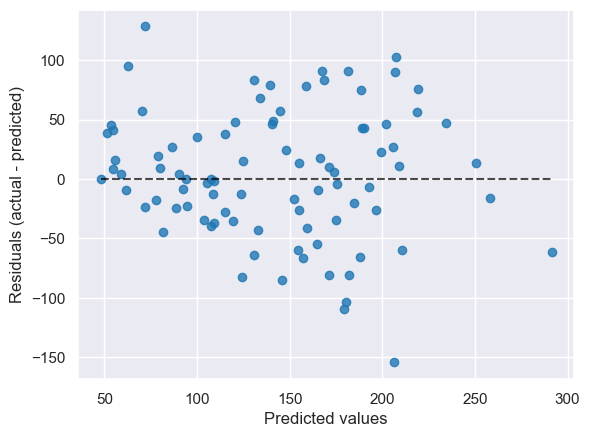

In [25]:
PredictionErrorDisplay.from_predictions(
    y_true=y_test,
    y_pred=y_pred
)

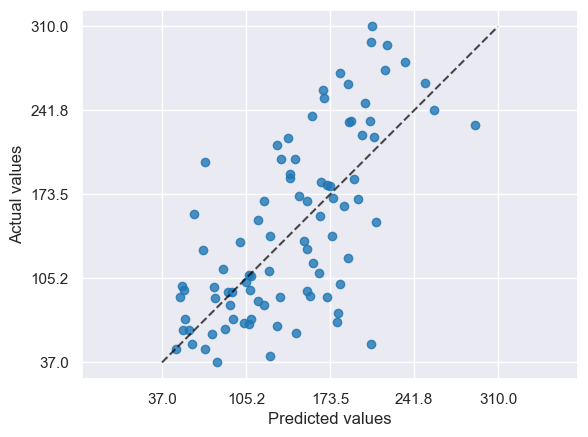

In [26]:
PredictionErrorDisplay.from_predictions(
    y_true=y_test,
    y_pred=y_pred,
    kind='actual_vs_predicted'
)

<Axes: xlabel='target', ylabel='Count'>

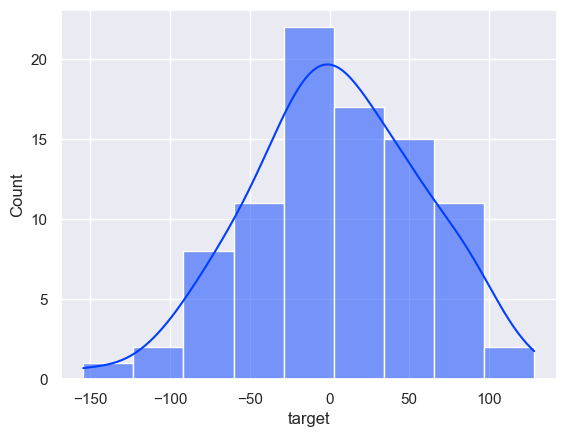

In [27]:
residuos = y_test - y_pred

sns.histplot(residuos, kde=True)

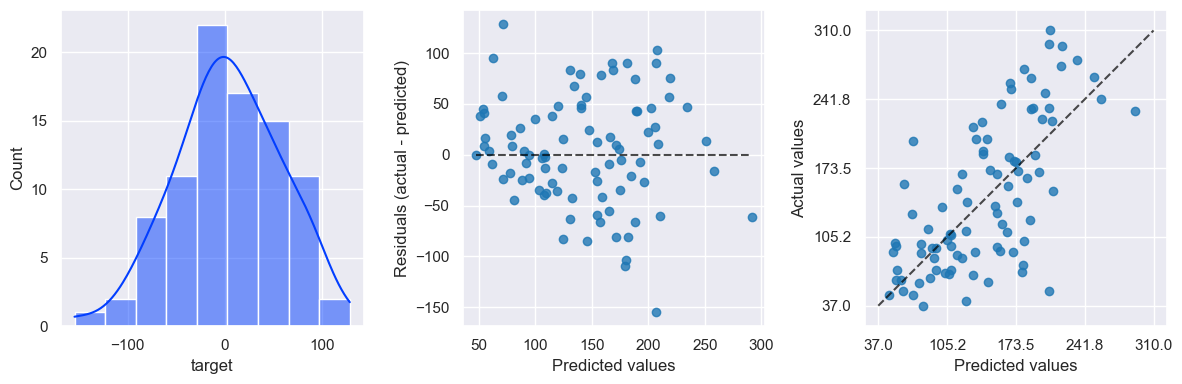

In [28]:
plot_residuos(y_test, y_pred)